## Набор маркетинговых данных банка

[Kaggle dataset](https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set)

### Атрибуты датасета:

#### данные клиента:

1 - age (numeric)

2 - job : тип работы (категории: 
"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services") 
                                    
3 - marital : материальный статус (категории: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education : образование (категории: "unknown","secondary","primary","tertiary")

5 - default: есть дефолт по кридиту? (binary: "yes","no")

6 - balance: среднегодовой баланс, в евро (numeric) 

7 - housing: есть кредит на жилье? (binary: "yes","no")

8 - loan: есть личный заем? (binary: "yes","no")

#### контакт с компанией:

9 - contact: тип связи (категории: "unknown","telephone","cellular") 

10 - day: последний день контакта в месяце (numeric)

11 - month: последний контакт месяц (категории: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: продолжительность последнего контакта, в секундах (numeric)

#### остальное:

13 - campaign: количество контактов, выполненных в ходе этой кампании для данного клиента (numeric, includes last contact)

14 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (numeric, -1 means client was not previously contacted)

15 - previous: количество контактов, выполненных до этой кампании и для этого клиента (numeric)

16 - poutcome: результаты предыдущей маркетинговой кампании (категории: "unknown","other","failure","success")

17 - y - подписал ли клиент долгосрочный вклад? (binary: "yes","no")

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)
plt.style.use('seaborn')

In [79]:
df = pd.read_csv("./bank.csv", sep=";")

## Уберем колонки `previous` и `poutcome`

In [80]:
df = df.drop(columns=["previous", "poutcome"])

In [81]:
df.shape

(4521, 15)

In [82]:
print("Признаки датасета:\n", df.columns.values)

Признаки датасета:
 ['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'y']


In [83]:
df.count()

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
y            4521
dtype: int64

In [84]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,no


## Приведение признаков к числовой шкале


In [85]:
# df["marital"] = df["marital"].map({
#     "single": 0,
#     "married": 1
# })

def repl_marital(val):
    if val == "single":
        return 0
    else:
        return 1

df["marital"] = df["marital"].apply(repl_marital, 1)

In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,no


In [87]:
df["housing"] = df["housing"].map({
    "no": 0,
    "yes": 1
})

In [88]:
df["loan"] = df["loan"].map({
    "no": 0,
    "yes": 1
})

In [89]:
df["default"].replace({
    "no": 0,
    "yes": 1
}, inplace=True)

In [90]:
df["contact"].replace({"unknown": np.nan,
            "telephone": 0,
            "cellular": 1}, inplace=True)

In [91]:
df.contact.unique()

array([ 1., nan,  0.])

In [92]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [93]:
df.month = df.month.map({
    'oct': 10, 'may': 5, 'apr': 4, 'jun': 6, 'feb': 2, 'aug': 8, 'jan': 1, 'jul': 7, 'nov': 11,
       'sep': 9, 'mar': 3, 'dec': 12
})

In [94]:
# df.poutcome.unique()

In [95]:

# df.poutcome = df.poutcome.map({
#     'unknown': np.nan, 
#     'failure': 0, 
#     'other': 1, 
#     'success': 2
# })

In [96]:
df["y"].replace({"no": 0, "yes": 1}, inplace=True)

In [97]:
df.y.unique()

array([0, 1])

In [98]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,unemployed,1,primary,0,1787,0,0,1.0,19,10,79,1,-1,0
1,33,services,1,secondary,0,4789,1,1,1.0,11,5,220,1,339,0
2,35,management,0,tertiary,0,1350,1,0,1.0,16,4,185,1,330,0
3,30,management,1,tertiary,0,1476,1,1,NaN,3,6,199,4,-1,0
4,59,blue-collar,1,secondary,0,0,1,0,NaN,5,5,226,1,-1,0


In [99]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [100]:
df["job"].replace({
    'unknown': np.nan,
    'unemployed': 0,
    'services': 1,
    'management': 2,
    'blue-collar': 3,
    'self-employed': 4,
    'technician': 5,
    'entrepreneur': 6,
    'admin.': 7,
    'student': 8,
    'housemaid': 9,
    'retired': 10
}, inplace=True)

In [101]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,0.0,1,primary,0,1787,0,0,1.0,19,10,79,1,-1,0
1,33,1.0,1,secondary,0,4789,1,1,1.0,11,5,220,1,339,0
2,35,2.0,0,tertiary,0,1350,1,0,1.0,16,4,185,1,330,0
3,30,2.0,1,tertiary,0,1476,1,1,NaN,3,6,199,4,-1,0
4,59,3.0,1,secondary,0,0,1,0,NaN,5,5,226,1,-1,0


In [102]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [103]:
df["education"].replace({
    'unknown': np.nan,
    'primary': 0,
    'secondary': 1, 
    'tertiary': 2 
}, inplace=True)

In [104]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,0.0,1,0.0,0,1787,0,0,1.0,19,10,79,1,-1,0
1,33,1.0,1,1.0,0,4789,1,1,1.0,11,5,220,1,339,0
2,35,2.0,0,2.0,0,1350,1,0,1.0,16,4,185,1,330,0
3,30,2.0,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0
4,59,3.0,1,1.0,0,0,1,0,NaN,5,5,226,1,-1,0


## Количество значений и пустых значений

In [105]:
df.count()

age          4521
job          4483
marital      4521
education    4334
default      4521
balance      4521
housing      4521
loan         4521
contact      3197
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
y            4521
dtype: int64

In [171]:
df.isnull().sum(axis = 0)

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
y               0
dtype: int64

In [173]:
df.isnull().sum(axis = 1).sort_values(ascending=False)

4137    3
178     3
2351    3
641     3
1218    3
       ..
1778    0
1779    0
1781    0
1785    0
4520    0
Length: 4521, dtype: int64

## Нормализация данных

In [106]:
df["balance"].min(), df["balance"].max()

(-3313, 71188)

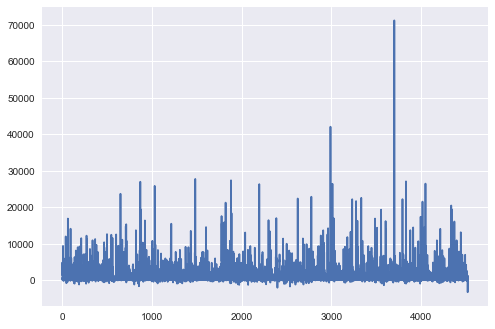

In [107]:
plt.plot(np.arange(df.balance.shape[0]), df.balance.values)
plt.show()

In [108]:
# min max
df["balance"] = df["balance"].apply(lambda v: (v - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))
df["pdays"] = df["pdays"].apply(lambda v: (v-df["pdays"].min())/(df["pdays"].max()-df["pdays"].min()))
df.duration = df.duration.apply(lambda v: ((v-df.duration.min())/(df.duration.max()-df.duration.min())))

In [109]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0


In [110]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.115240
std,10.576211,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,1.000000


In [111]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.0,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.0,0
8,41,6.0,1,2.0,0,0.047436,1,0,NaN,14,5,0.017544,2,0.0,0
10,39,1.0,1,1.0,0,0.170293,1,0,NaN,20,5,0.089043,1,0.0,0
18,25,3.0,0,0.0,0,0.041503,1,0,NaN,23,5,0.081430,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,42,7.0,1,NaN,0,0.053087,1,1,NaN,16,5,0.167163,2,0.0,0
4510,36,5.0,1,1.0,0,0.052066,1,0,NaN,20,5,0.041377,2,0.0,0
4511,46,3.0,1,1.0,0,0.053436,1,0,NaN,15,5,0.416749,2,0.0,1
4512,40,3.0,1,1.0,0,0.059234,1,0,NaN,29,5,0.217147,2,0.0,0


In [112]:
df[~df["contact"].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,0
5,35,2.0,0,2.0,0,0.054496,0,0,1.0,23,2,0.045349,2,0.202982,0
6,36,4.0,1,2.0,0,0.048590,1,0,1.0,14,5,0.111552,1,0.379587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,1.0,0,1.0,0,0.050818,1,0,1.0,7,7,0.205230,5,0.000000,0
4516,33,1.0,1,1.0,0,0.039999,1,0,1.0,30,7,0.107580,5,0.000000,0
4518,57,5.0,1,1.0,0,0.048429,0,0,1.0,19,8,0.048659,11,0.000000,0
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,0.041377,4,0.243119,0


In [113]:
df.to_csv("./preprocessed.csv", index=False)

In [114]:
new_df = pd.read_csv("./preprocessed.csv")

In [115]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0


## Корреляция и дисперсия

In [116]:
new_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
age,111.856238,6.608079,1.916468,-1.333389,-0.024320,0.035812,-1.016432,-0.042818,-0.660154,-1.557268,1.855475,-0.002153,-0.169314,-0.010800,0.152297
job,6.608079,6.421861,0.024831,-0.267142,0.000261,0.004771,-0.176325,0.008768,-0.064417,0.010942,0.157616,-0.002000,-0.329513,0.000409,0.053738
marital,1.916468,0.024831,0.194603,-0.050009,-0.000419,-0.000134,0.009063,0.007699,-0.007486,-0.024628,0.064926,-0.000932,0.011102,-0.001048,-0.006454
education,-1.333389,-0.267142,-0.050009,0.443989,-0.000997,0.001524,-0.023981,-0.006013,0.022508,0.093661,0.131709,-0.000643,0.020258,0.000881,0.011808
default,-0.024320,0.000261,-0.000419,-0.000997,0.016532,-0.000368,0.000439,0.002961,0.000847,-0.014062,0.002727,-0.000128,-0.004937,-0.000389,0.000053
balance,0.035812,0.004771,-0.000134,0.001524,-0.000368,0.001632,-0.001006,-0.001037,-0.000438,-0.002891,0.009596,-0.000055,-0.001253,0.000044,0.000231
housing,-1.016432,-0.176325,0.009063,-0.023981,0.000439,-0.001006,0.245695,0.003291,0.006790,-0.127923,-0.201501,0.000671,-0.005509,0.006653,-0.016571
loan,-0.042818,0.008768,0.007699,-0.006013,0.002961,-0.001037,0.003291,0.129510,0.000756,-0.014483,0.033575,-0.000155,0.019160,-0.001284,-0.008104
contact,-0.660154,-0.064417,-0.007486,0.022508,0.000847,-0.000438,0.006790,0.000756,0.085313,-0.131600,0.011419,0.000671,-0.030056,0.000918,-0.000216
day,-1.557268,0.010942,-0.024628,0.093661,-0.014062,-0.002891,-0.127923,-0.014483,-0.131600,68.024016,1.577849,-0.017473,4.121894,-0.089349,-0.029616


In [117]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
age,1.000000,0.246948,0.410768,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,0.045092
job,0.246948,1.000000,0.022194,-0.159257,0.000797,0.046488,-0.140553,0.009586,-0.084848,0.000524,0.026193,-0.009160,-0.041718,0.001408,0.066550
marital,0.410768,0.022194,1.000000,-0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.045815
education,-0.190484,-0.159257,-0.169967,1.000000,-0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.055368
default,-0.017885,0.000797,-0.007391,-0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,0.001303
balance,0.083820,0.046488,-0.007525,0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.017905
housing,-0.193888,-0.140553,0.041449,-0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,-0.104683
loan,-0.011250,0.009586,0.048496,-0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.070517
contact,-0.204200,-0.084848,-0.056938,0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,-0.002108
day,-0.017853,0.000524,-0.006769,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.011244


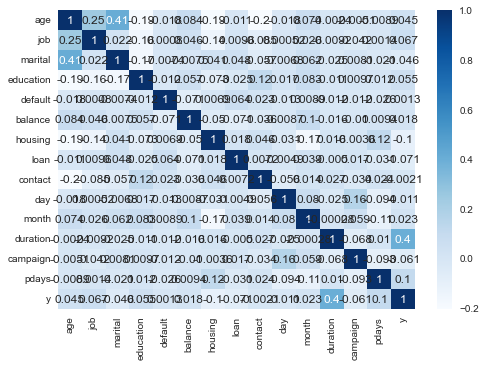

In [118]:
sns.heatmap(new_df.corr(), cmap="Blues", annot=True);

In [119]:
new_df.corr()["y"].sort_values(ascending=False)

y            1.000000
duration     0.401118
pdays        0.104087
job          0.066550
education    0.055368
age          0.045092
month        0.023335
balance      0.017905
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

## Очистка выбросов (аномалий) + графики

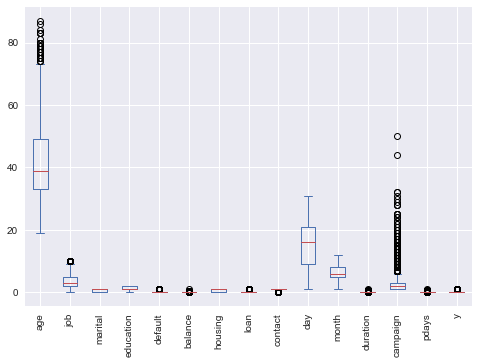

In [120]:
new_df.plot.box()
plt.xticks(list(range(1, len(new_df.columns)+1)), new_df.columns, rotation='vertical');

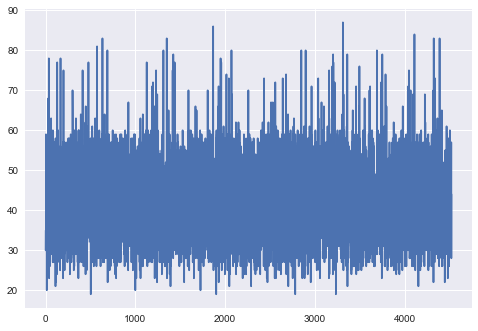

In [121]:
plt.plot(df.age.values);

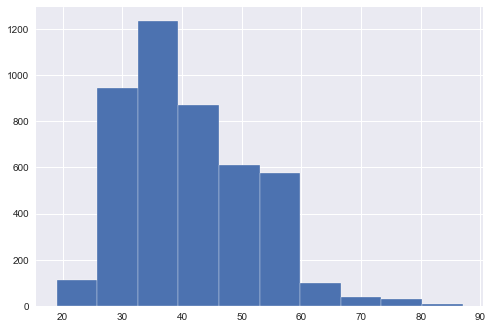

In [122]:
plt.hist(df.age.values);

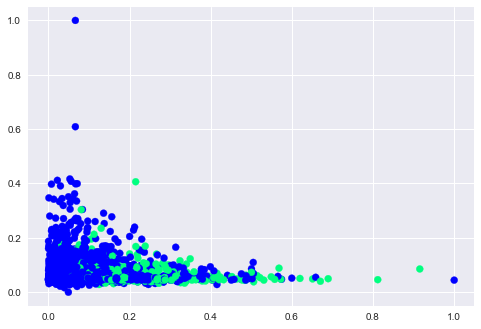

In [123]:
plt.scatter(new_df.duration, new_df.balance, c=new_df.y, cmap="winter");

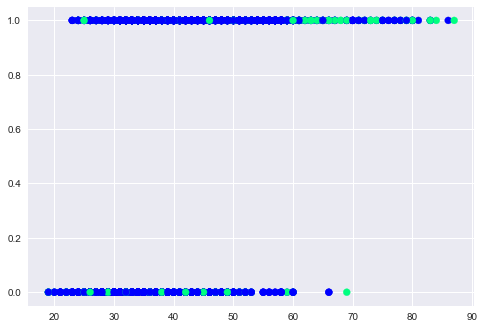

In [124]:
plt.scatter(df.age, df.marital, c=new_df.y, cmap="winter");

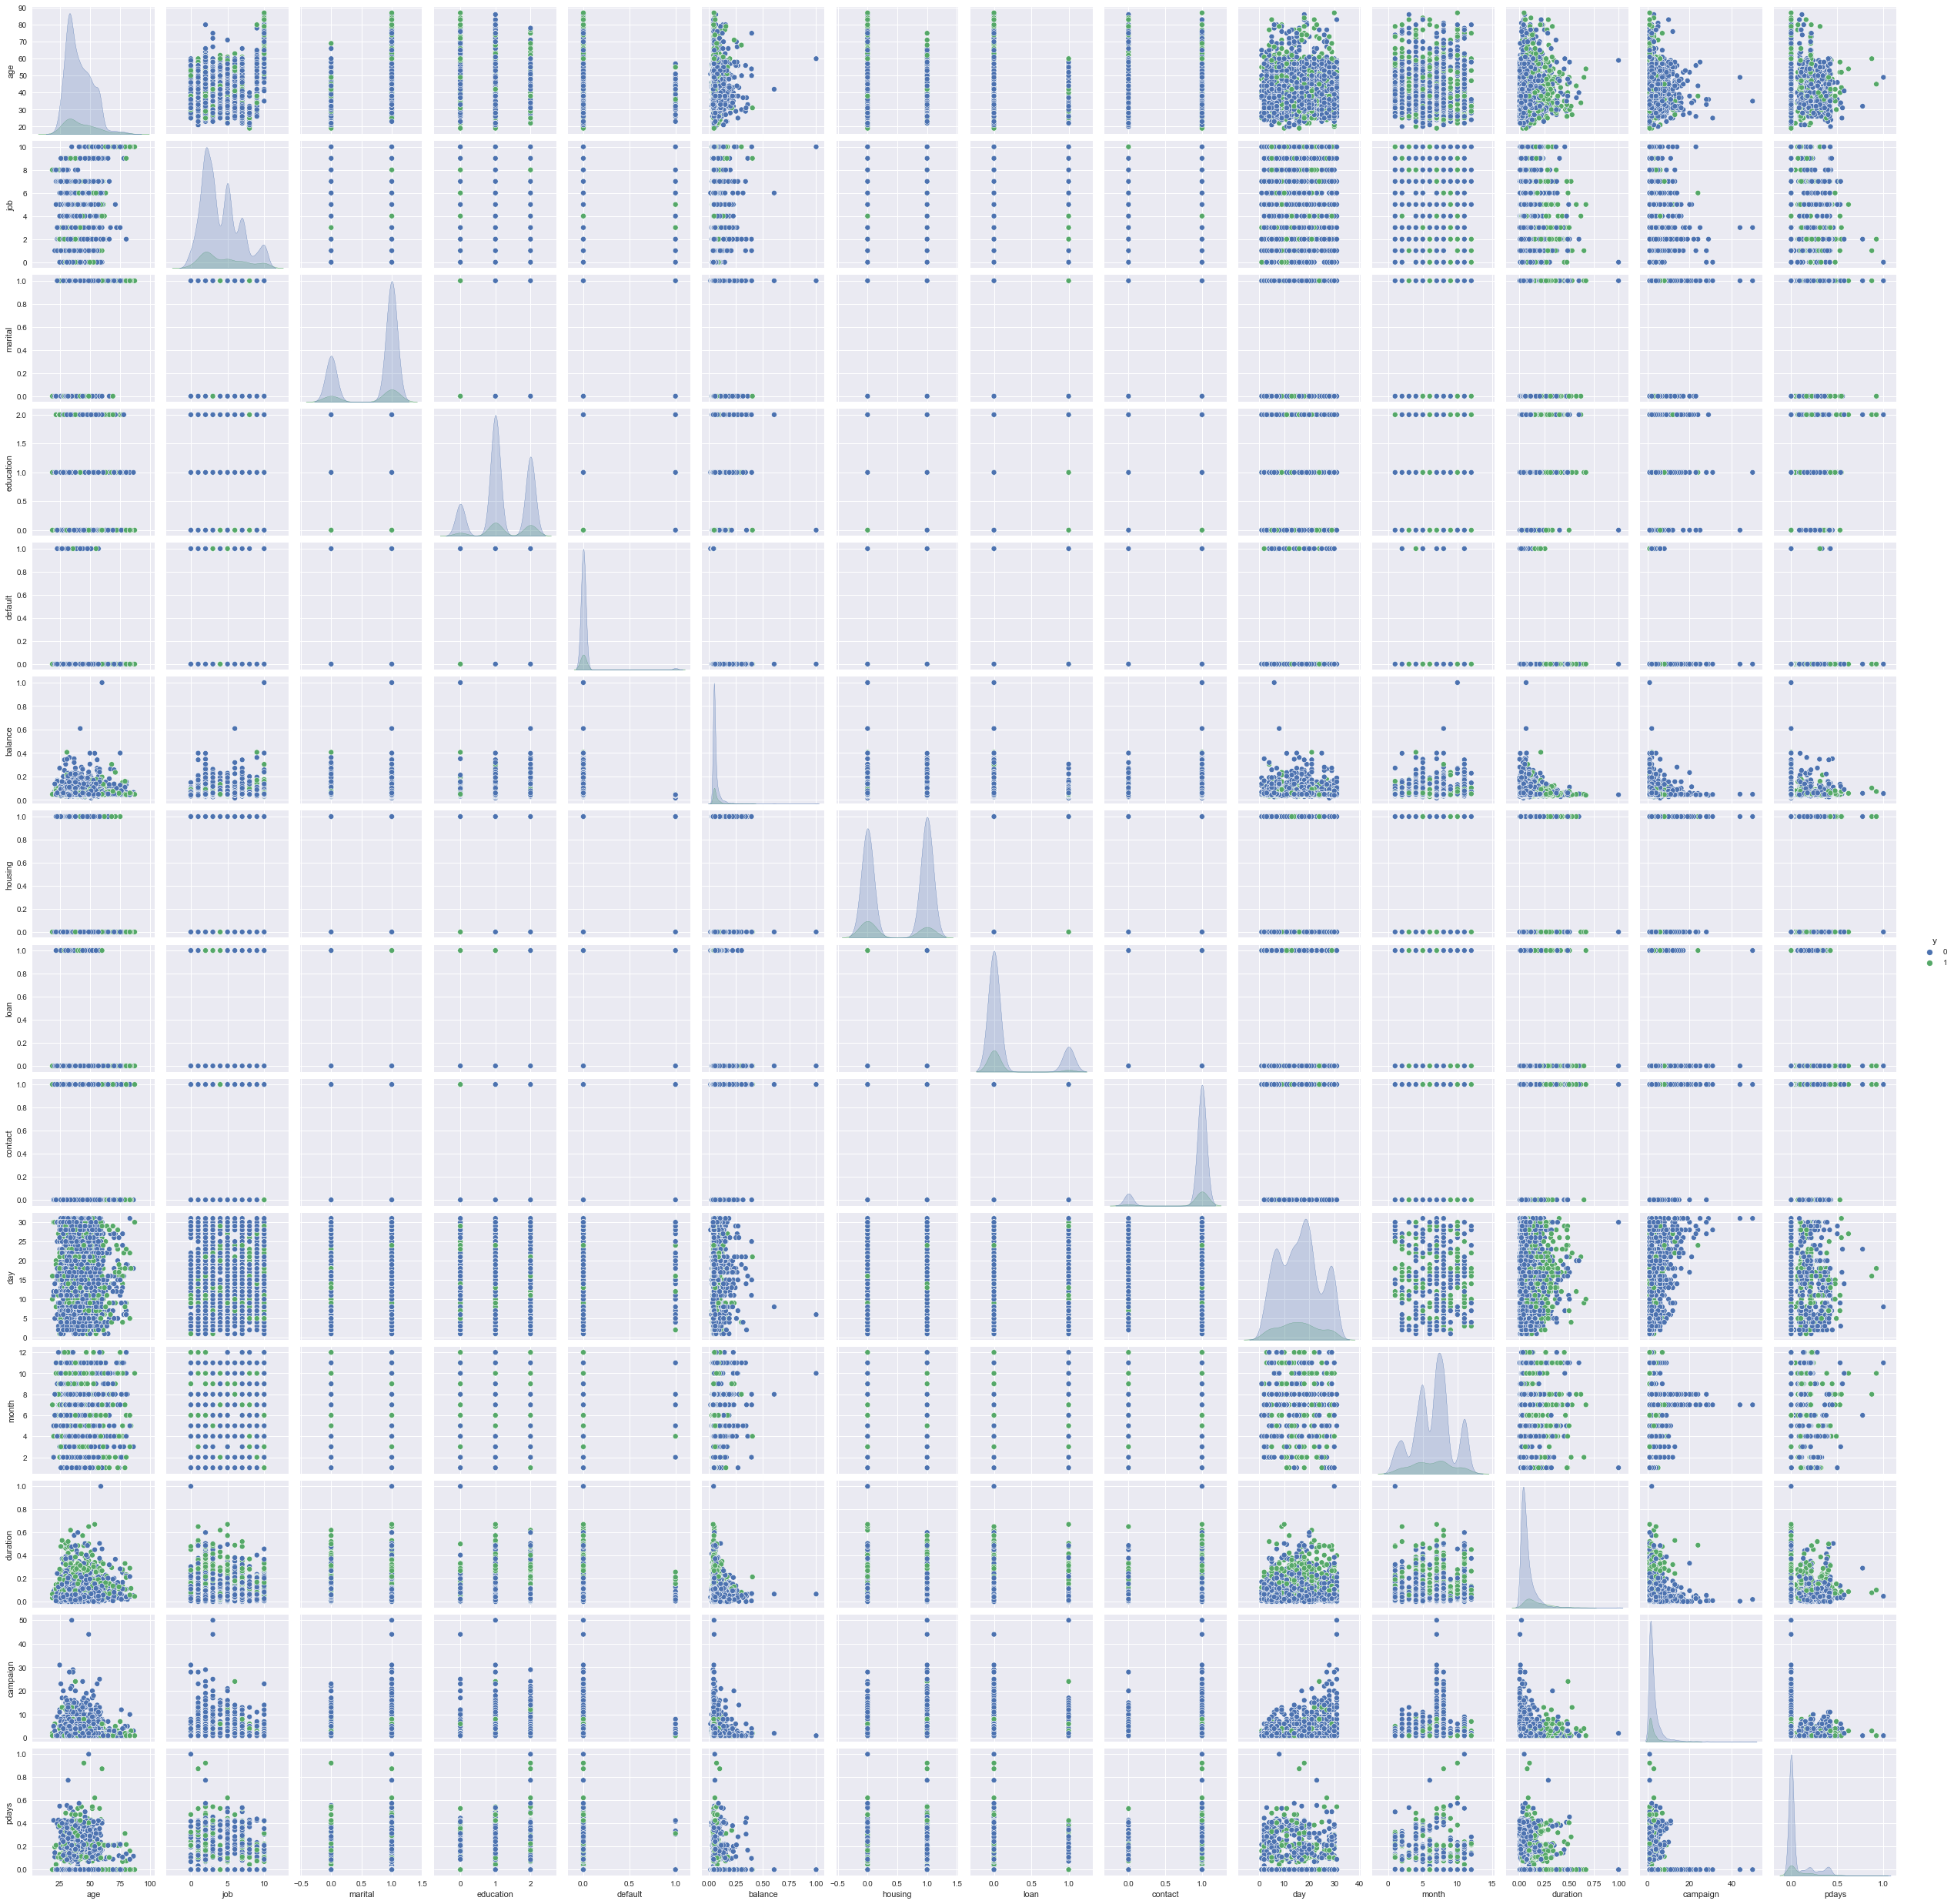

In [125]:
sns.pairplot(new_df.dropna(), hue="y")

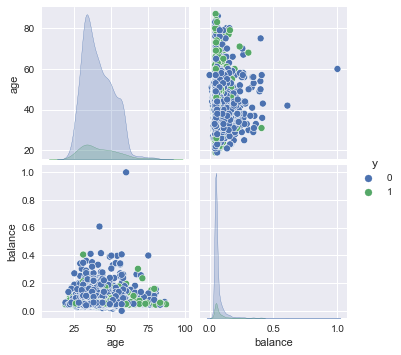

In [127]:
sns.pairplot(df[["age", "balance", "y"]].dropna(), hue="y")

In [128]:
low = 0.01
high = 0.99
new_df.quantile([low, high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0.01,24.0,0.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002052,1.0,0.000000,0.0
0.99,72.0,10.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.415425,16.0,0.425459,1.0


In [129]:
qdf = new_df.quantile([low, high])

In [130]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [131]:
qdf.age[low]

24.0

In [132]:
# добавляем np.nan, чтобы потом удалить
new_df.age = new_df.age.apply(lambda v: v if qdf.age[low] < v < qdf.age[high] else np.nan)

In [133]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.057876,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.115240
std,9.751862,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,1.000000


In [134]:
new_df.age.dropna(inplace=True)

In [135]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.057876,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.115240
std,9.751862,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,1.000000


In [136]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30.0,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0
1,33.0,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,0
2,35.0,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,0
3,30.0,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0


In [137]:
new_df.age.unique()

array([30., 33., 35., 59., 36., 39., 41., 43., nan, 31., 40., 56., 37.,
       25., 38., 42., 44., 26., 55., 67., 53., 68., 32., 49., 52., 34.,
       61., 45., 48., 57., 54., 63., 51., 29., 50., 27., 60., 28., 58.,
       46., 47., 70., 65., 64., 62., 66., 71., 69.])

<AxesSubplot:ylabel='age'>

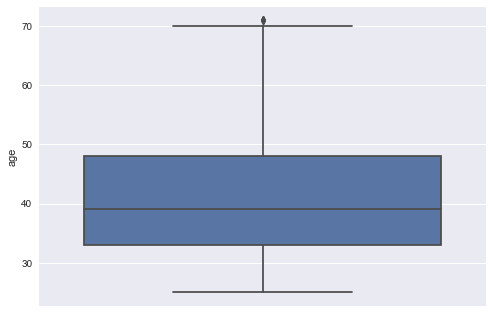

In [174]:
# box age после очистки
sns.boxplot(y=new_df.age);

In [139]:
new_df.to_csv("./preprocessed.csv", index=False)

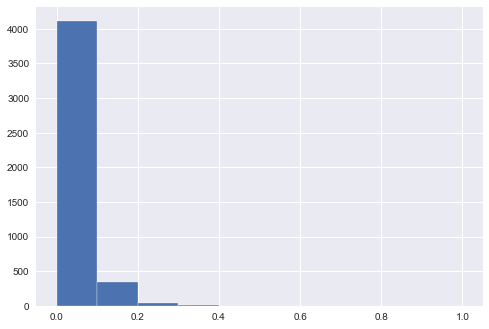

In [166]:
plt.hist(new_df.balance.values)
plt.show()

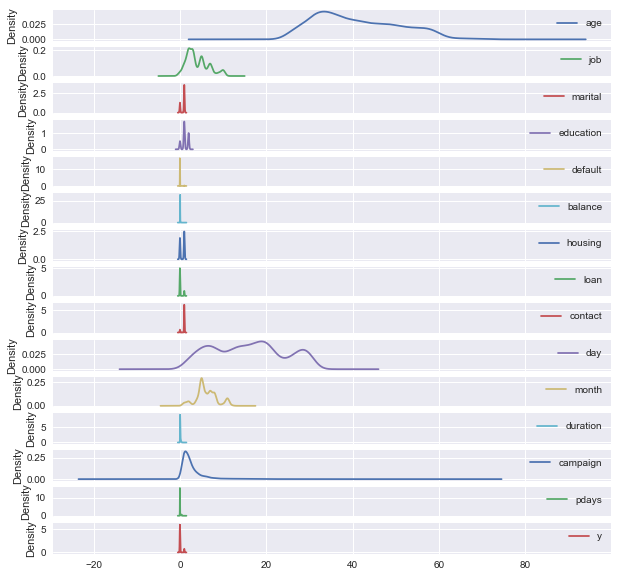

In [141]:
new_df.plot.kde(subplots=True, figsize=(10, 10));